Film-frame restoration

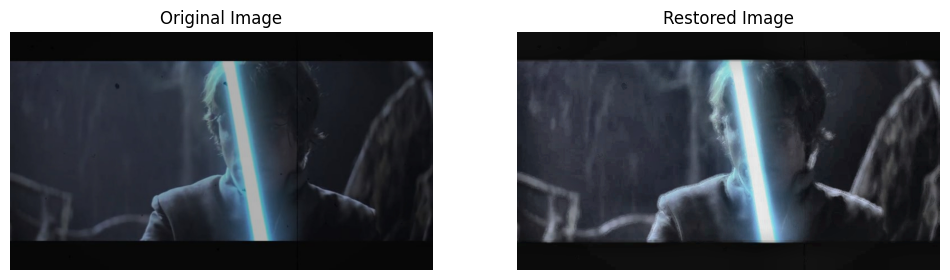

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "starwars1.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#the dataset contains clean images, meaning no noise
#not removing noise as no significant noise observed in original frame

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4) #detect scratches using adaptive
#thresholding

inpainted = cv2.inpaint(image, thresh, 3, cv2.INPAINT_TELEA) #inpainting to remove holes

# Apply CLAHE for contrast enhancement instead of histogram equalisation (contrast too harsh)
#contrast enhancement done to bring out the objects in the background
image_lab = cv2.cvtColor(inpainted, cv2.COLOR_BGR2LAB)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_lab[:, :, 0] = clahe.apply(image_lab[:, :, 0])
contrast_enhanced = cv2.cvtColor(image_lab, cv2.COLOR_LAB2BGR)

restored_image = cv2.cvtColor(contrast_enhanced, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Restored Image")
plt.imshow(restored_image)
plt.axis("off")

plt.show()

Issue: The restored image is blurry because inpainting is being carried out globally (i.e. all over the image). Solution: Manually inpaint the scratches and holes.

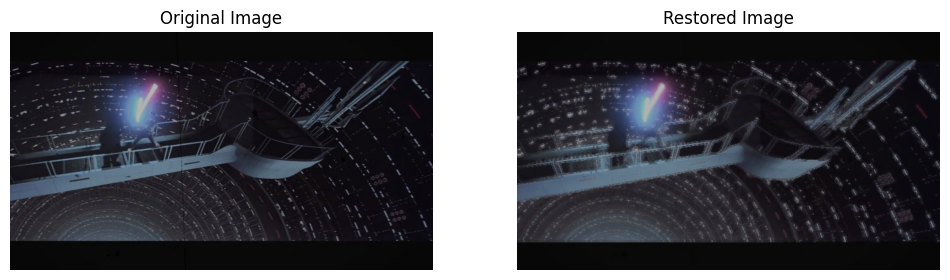

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "starwars2.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#not removing noise as no significant noise observed in original frame

thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4) #detect scratches using adaptive
#thresholding

inpainted = cv2.inpaint(image, thresh, 1, cv2.INPAINT_TELEA) #inpainting to remove holes (radius very small, because increasing it is casing
#the image to blur)

#no contrast enhancement as all details visible

restored_image = cv2.cvtColor(inpainted, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Restored Image")
plt.imshow(restored_image)
plt.axis("off")

plt.show()


Issue: The restored image is blurry because inpainting is being carried out globally (i.e. all over the image). Solution: Manually inpaint the scratches and holes.

Image segmentation

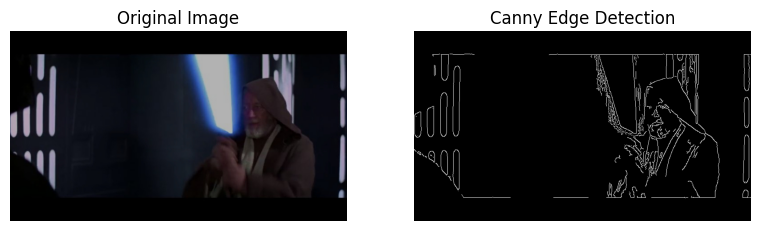

In [ ]:
#Canny - to detect the man
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("strwars3.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

canny_edges = cv2.Canny(gray_image, 20, 50) #lower threshold - 20, upper threshold - 50 -> because contrast of image is high

plt.figure(figsize=(20, 10))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Canny Edge Detection")
plt.imshow(canny_edges, cmap='gray')
plt.axis("off")

plt.show()


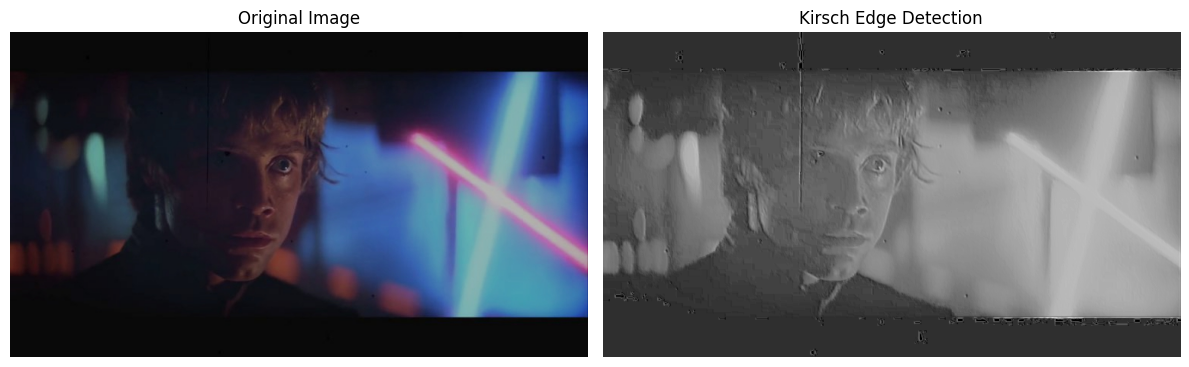

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("starwars4.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Enhance contrast (optional)
gray_image = cv2.equalizeHist(gray_image)

# Define Kirsch kernels
kirsch_kernels = [
    np.array([[-3, -3, 5], [-3, 0, 5], [-3, -3, 5]], dtype=np.float32),
    np.array([[-3, 5, 5], [-3, 0, 5], [-3, -3, -3]], dtype=np.float32),
    np.array([[5, 5, 5], [-3, 0, -3], [-3, -3, -3]], dtype=np.float32),
    np.array([[5, 5, -3], [5, 0, -3], [-3, -3, -3]], dtype=np.float32),
    np.array([[5, -3, -3], [5, 0, -3], [5, -3, -3]], dtype=np.float32),
    np.array([[5, -3, -3], [5, 0, -3], [5, 5, -3]], dtype=np.float32),
    np.array([[-3, -3, -3], [-3, 0, -3], [5, 5, 5]], dtype=np.float32),
    np.array([[-3, -3, -3], [5, 0, -3], [5, 5, -3]], dtype=np.float32)
]

# Apply each kernel and compute max response
kirsch_edges = np.zeros_like(gray_image, dtype=np.float32)

for kernel in kirsch_kernels:
    edge_response = cv2.filter2D(gray_image.astype(np.float32), -1, kernel)
    kirsch_edges = np.maximum(kirsch_edges, edge_response)

# Normalize the result
kirsch_edges = cv2.normalize(kirsch_edges, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Kirsch Edge Detection")
plt.imshow(kirsch_edges, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


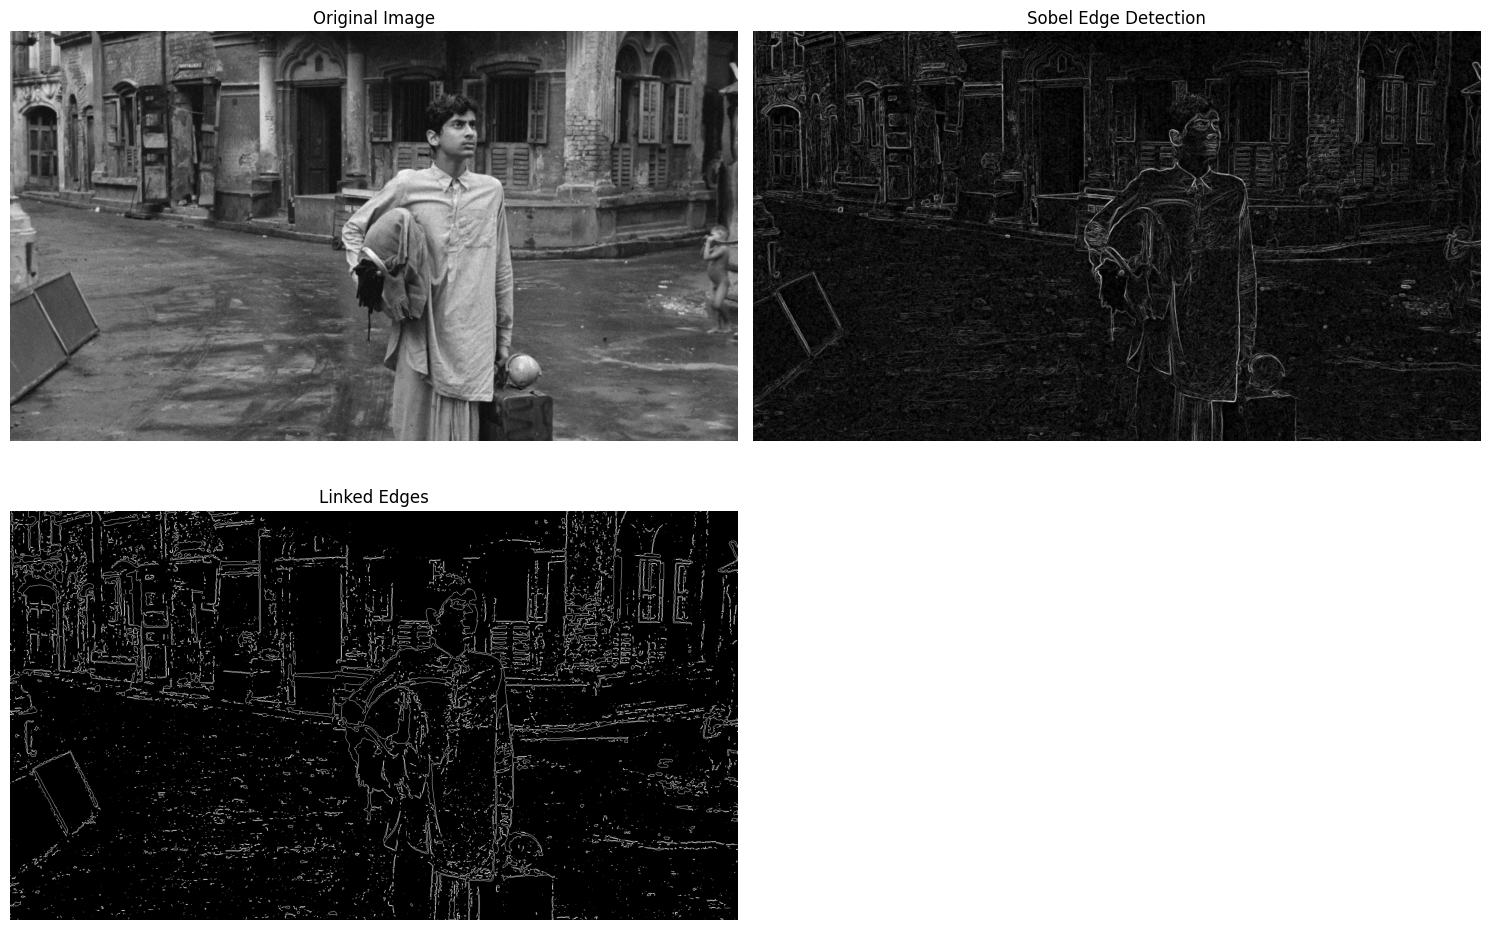

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("apu-2.webp")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Sobel operator for edge detection
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Normalize the Sobel magnitude to the range [0, 255]
sobel_edges = cv2.normalize(sobel_magnitude, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

# Threshold the Sobel edge image to get binary edges
_, binary_edges = cv2.threshold(sobel_edges, 50, 150, cv2.THRESH_BINARY)

# Morphological operations for edge linking
kernel = np.ones((3, 3), np.uint8)
dilated_edges = cv2.dilate(binary_edges, kernel, iterations=1)
linked_edges = cv2.erode(dilated_edges, kernel, iterations=1)

# Find contours for linked edges
contours, _ = cv2.findContours(linked_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the linked edges on a blank image
linked_edges_image = np.zeros_like(gray_image)
cv2.drawContours(linked_edges_image, contours, -1, (255), thickness=1)

# Display the input, Sobel edges, and linked edges
plt.figure(figsize=(15, 10))

# First row
plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image_rgb)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Sobel Edge Detection")
plt.imshow(sobel_edges, cmap='gray')
plt.axis("off")

# Second row
plt.subplot(2, 2, 3)
plt.title("Linked Edges")
plt.imshow(linked_edges_image, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()


* Goal: Zero down on image of the boy.
* Solution suggested by ma'am: Remove background using a mask. Then apply Sobel Edge detection on the image of the boy, and then carry out Edge linking.


* Output of Sobel edge detection is more suited for viewing by humans
* Output of Edge linking is more suited for viewing by ML models/ CV models etc.  